In [23]:
# Dependencies
import pandas as pd
from matplotlib import pyplot as plt
import scipy.stats as stats

In [2]:
filepath = "../data/clean/regional-us-weekly-enriched.csv"
df = pd.read_csv(filepath)
df_sum = df.groupby(["Track Name", "Artist"]).sum()
df_sorted = df_sum.sort_values(by=["Streams"], ascending=False)
df_total_streams = pd.DataFrame(df_sorted["Streams"])
df_total_streams.columns = ["2018 Total Streams"]
df_total_streams
df_unique = df.drop_duplicates(subset=["Track Name", "Artist"])
df_unique = df_unique.set_index(["Track Name", "Artist"])
# df_unique = df_unique["Album", "Acousticness", "Danceability", "Energy", "Instrumentalness", "Key", "Liveness", "Loudness", "Mode", "Speechiness", "Tempo", "Time Signature", "Valence"]
df_unique = df_unique.drop(labels=["Position", "Streams", "Week Start Date", "Week End Date", "Image", "Popularity"], axis=1)
df_combined = pd.concat([df_total_streams, df_unique], axis=1)
df_combined = df_combined.sort_values(by="2018 Total Streams", ascending=False)
df_combined = df_combined.reset_index(level="Artist")
df_combined["Explicit"] = df_combined["Explicit"].astype(int)
df_combined["Duration (ms)"] = df_combined["Duration (ms)"] / 1000
df_combined.rename(columns={"Duration (ms)":"Duration (s)"}, inplace=True)
df_combined

,Artist,2018 Total Streams,URL,Acousticness,Album,Danceability,Duration (s),Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
Track Name,,,,,,,,,,,,,,,,,,
God's Plan,Drake,460070262,https://open.spotify.com/track/2XW4DbS6NddZxRP...,0.030900,Scary Hours,0.758,198.960,0.448,1,0.000087,7,0.5580,-9.441,1,0.1030,77.176,4,0.3730
SAD!,XXXTENTACION,340496175,https://open.spotify.com/track/35ieKju5aLWFN5U...,0.258000,SAD!,0.740,166.568,0.613,1,0.003720,8,0.1230,-4.880,1,0.1450,75.023,4,0.4730
Psycho (feat. Ty Dolla $ign),Post Malone,310156476,https://open.spotify.com/track/65NwOZqoXny4Jxq...,0.566000,Psycho (feat. Ty Dolla $ign),0.740,220.880,0.558,1,0.000000,8,0.1120,-8.115,1,0.1020,140.057,4,0.4210
Lucid Dreams,Juice WRLD,303942353,https://open.spotify.com/track/32iYwQ4OYiurnGn...,0.377000,Lucid Dreams,0.437,239.947,0.481,1,0.000000,11,0.3300,-9.681,0,0.2370,83.606,4,0.2160
Look Alive (feat. Drake),BlocBoy JB,268178220,https://open.spotify.com/track/4qKcDkK6siZ7Jp1...,0.001040,Look Alive (feat. Drake),0.922,181.263,0.581,1,0.000059,10,0.1050,-7.495,1,0.2700,140.022,4,0.5950
Nice For What,Drake,267229876,https://open.spotify.com/track/1cTZMwcBJT0Ka3U...,0.093400,Nice For What,0.567,210.926,0.913,1,0.000124,8,0.1140,-6.471,1,0.0736,93.350,4,0.7920
Better Now,Post Malone,254685346,https://open.spotify.com/track/7dt6x5M1jzdTEt8...,0.354000,beerbongs & bentleys,0.680,231.267,0.563,1,0.000000,10,0.1360,-5.843,1,0.0454,145.028,4,0.3740
Moonlight,XXXTENTACION,249897971,https://open.spotify.com/track/0JP9xo3adEtGSdU...,0.556000,?,0.921,135.090,0.537,1,0.004040,9,0.1020,-5.723,0,0.0804,128.009,4,0.7110
In My Feelings,Drake,247009164,https://open.spotify.com/track/0bAkKNCQfWkexHF...,0.006230,Scorpion,0.735,217.933,0.482,1,0.014400,8,0.4480,-9.445,1,0.1390,181.995,4,0.3150


In [3]:
# 3/4 Time Signature songs because Max was curious.
df_34 = df[df["Time Signature"] == 3]
df_34

,Position,Track Name,Artist,Streams,URL,Week Start Date,Week End Date,Acousticness,Album,Danceability,...,Instrumentalness,Key,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Time Signature,Valence
18,19,Perfect,Ed Sheeran,4273504,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2017-12-29,2018-01-05,0.16300,÷ (Deluxe),0.599,...,0.000000,8,0.1060,-6.312,1,87,0.0232,95.050,3,0.1680
49,50,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,2856506,https://open.spotify.com/track/1bhUWB0zJMIKr9y...,2017-12-29,2018-01-05,0.77900,Perfect Duet (Ed Sheeran & Beyoncé),0.587,...,0.000000,8,0.1230,-7.365,1,83,0.0263,94.992,3,0.3560
115,116,do re mi,blackbear,1686621,https://open.spotify.com/track/3Q3myFA7q4Op95D...,2017-12-29,2018-01-05,0.00419,digital druglord,0.742,...,0.000010,8,0.1260,-6.256,1,78,0.0465,110.977,3,0.1540
119,120,Never Enough,Loren Allred,1664205,https://open.spotify.com/track/0Gl5s8IhMmQE5YQ...,2017-12-29,2018-01-05,0.42300,The Greatest Showman (Original Motion Picture ...,0.277,...,0.000000,8,0.0952,-8.903,1,81,0.0336,86.777,3,0.2270
129,130,A Million Dreams,Ziv Zaifman,1595062,https://open.spotify.com/track/0RoA7ObU6phWpqh...,2017-12-29,2018-01-05,0.24300,The Greatest Showman (Original Motion Picture ...,0.265,...,0.000000,7,0.0893,-11.689,1,81,0.0569,54.747,3,0.0998
227,28,Perfect,Ed Sheeran,4268123,https://open.spotify.com/track/0tgVpDi06FyKpA1...,2018-01-05,2018-01-12,0.16300,÷ (Deluxe),0.599,...,0.000000,8,0.1060,-6.312,1,87,0.0232,95.050,3,0.1680
252,53,Perfect Duet (Ed Sheeran & Beyoncé),Ed Sheeran,2868264,https://open.spotify.com/track/1bhUWB0zJMIKr9y...,2018-01-05,2018-01-12,0.77900,Perfect Duet (Ed Sheeran & Beyoncé),0.587,...,0.000000,8,0.1230,-7.365,1,83,0.0263,94.992,3,0.3560
281,82,Never Enough,Loren Allred,2138590,https://open.spotify.com/track/0Gl5s8IhMmQE5YQ...,2018-01-05,2018-01-12,0.42300,The Greatest Showman (Original Motion Picture ...,0.277,...,0.000000,8,0.0952,-8.903,1,81,0.0336,86.777,3,0.2270
282,83,A Million Dreams,Ziv Zaifman,2117766,https://open.spotify.com/track/0RoA7ObU6phWpqh...,2018-01-05,2018-01-12,0.24300,The Greatest Showman (Original Motion Picture ...,0.265,...,0.000000,7,0.0893,-11.689,1,81,0.0569,54.747,3,0.0998
328,129,do re mi,blackbear,1708449,https://open.spotify.com/track/3Q3myFA7q4Op95D...,2018-01-05,2018-01-12,0.00419,digital druglord,0.742,...,0.000010,8,0.1260,-6.256,1,78,0.0465,110.977,3,0.1540


In [4]:
df_top10 = df_combined.iloc[:10]
df_top10

,Artist,2018 Total Streams,URL,Acousticness,Album,Danceability,Duration (s),Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
Track Name,,,,,,,,,,,,,,,,,,
God's Plan,Drake,460070262,https://open.spotify.com/track/2XW4DbS6NddZxRP...,0.03090,Scary Hours,0.758,198.960,0.448,1,0.000087,7,0.558,-9.441,1,0.1030,77.176,4,0.373
SAD!,XXXTENTACION,340496175,https://open.spotify.com/track/35ieKju5aLWFN5U...,0.25800,SAD!,0.740,166.568,0.613,1,0.003720,8,0.123,-4.880,1,0.1450,75.023,4,0.473
Psycho (feat. Ty Dolla $ign),Post Malone,310156476,https://open.spotify.com/track/65NwOZqoXny4Jxq...,0.56600,Psycho (feat. Ty Dolla $ign),0.740,220.880,0.558,1,0.000000,8,0.112,-8.115,1,0.1020,140.057,4,0.421
Lucid Dreams,Juice WRLD,303942353,https://open.spotify.com/track/32iYwQ4OYiurnGn...,0.37700,Lucid Dreams,0.437,239.947,0.481,1,0.000000,11,0.330,-9.681,0,0.2370,83.606,4,0.216
Look Alive (feat. Drake),BlocBoy JB,268178220,https://open.spotify.com/track/4qKcDkK6siZ7Jp1...,0.00104,Look Alive (feat. Drake),0.922,181.263,0.581,1,0.000059,10,0.105,-7.495,1,0.2700,140.022,4,0.595
Nice For What,Drake,267229876,https://open.spotify.com/track/1cTZMwcBJT0Ka3U...,0.09340,Nice For What,0.567,210.926,0.913,1,0.000124,8,0.114,-6.471,1,0.0736,93.350,4,0.792
Better Now,Post Malone,254685346,https://open.spotify.com/track/7dt6x5M1jzdTEt8...,0.35400,beerbongs & bentleys,0.680,231.267,0.563,1,0.000000,10,0.136,-5.843,1,0.0454,145.028,4,0.374
Moonlight,XXXTENTACION,249897971,https://open.spotify.com/track/0JP9xo3adEtGSdU...,0.55600,?,0.921,135.090,0.537,1,0.004040,9,0.102,-5.723,0,0.0804,128.009,4,0.711
In My Feelings,Drake,247009164,https://open.spotify.com/track/0bAkKNCQfWkexHF...,0.00623,Scorpion,0.735,217.933,0.482,1,0.014400,8,0.448,-9.445,1,0.1390,181.995,4,0.315


In [5]:
df_bottom10 = df_combined.iloc[1286:1296]
df_bottom10

,Artist,2018 Total Streams,URL,Acousticness,Album,Danceability,Duration (s),Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
Track Name,,,,,,,,,,,,,,,,,,
Huncho Jack,Huncho Jack,1284019,https://open.spotify.com/track/5vuiHi3QYbwcm1O...,0.00790,"Huncho Jack, Jack Huncho",0.793,199.227,0.568,1,0.000000,5,0.1850,-3.528,0,0.0497,136.931,4,0.0611
So Good (& Metro Boomin),Big Sean,1273030,https://open.spotify.com/track/0fWBFDRTIuk8ZgN...,0.01440,Double Or Nothing (& Metro Boomin),0.619,268.720,0.404,1,0.000000,8,0.1150,-8.333,0,0.4410,90.008,4,0.5660
No Problem (feat. Lil Wayne & 2 Chainz),Chance the Rapper,1264882,https://open.spotify.com/track/0v9Wz8o0BT8DU38...,0.15600,Coloring Book,0.652,304.607,0.795,1,0.000000,11,0.1230,-5.192,0,0.1740,135.018,4,0.7880
Good Old Days (feat. Kesha),Macklemore,1253378,https://open.spotify.com/track/2Za1AlJNvksouPP...,0.44600,GEMINI,0.712,240.507,0.510,0,0.000025,8,0.1120,-8.162,1,0.0633,122.964,4,0.2680
Swang,Rae Sremmurd,1247887,https://open.spotify.com/track/6mapJIPnQ23RTAe...,0.20000,SremmLife 2 (Deluxe),0.681,208.120,0.314,1,0.000010,8,0.1000,-9.319,1,0.0581,139.992,4,0.1660
From The D To The A (feat. Lil Yachty),Tee Grizzley,1212380,https://open.spotify.com/track/2NyrXRn4tancYPW...,0.19500,From The D To The A (feat. Lil Yachty),0.851,158.684,0.625,1,0.000000,10,0.2660,-5.417,0,0.3030,99.061,4,0.6680
Galway Girl,Ed Sheeran,1202864,https://open.spotify.com/track/0afhq8XCExXpqaz...,0.07350,÷ (Deluxe),0.624,170.827,0.876,0,0.000000,9,0.3270,-3.374,1,0.1000,99.943,4,0.7810
What They Want,Russ,1197454,https://open.spotify.com/track/3pndPhlQWjuSoXh...,0.48400,There's Really A Wolf,0.710,165.853,0.404,1,0.000000,1,0.0953,-10.040,0,0.3790,139.553,4,0.3980
Stargazing,Kygo,1197037,https://open.spotify.com/track/0Zbbxnx4SGGHoIo...,0.15200,Stargazing - EP,0.677,236.853,0.497,0,0.000000,5,0.0911,-5.763,1,0.0809,99.137,4,0.4190


In [6]:
df_worst = df_combined.loc[["Psycho (feat. Ty Dolla $ign)",
                            "FEFE (feat. Nicki Minaj & Murda Beatz)",
                            "Girls Like You (feat. Cardi B)",
                            "Let Me",
                            "Fall"]]
df_worst

,Artist,2018 Total Streams,URL,Acousticness,Album,Danceability,Duration (s),Energy,Explicit,Instrumentalness,Key,Liveness,Loudness,Mode,Speechiness,Tempo,Time Signature,Valence
Track Name,,,,,,,,,,,,,,,,,,
Psycho (feat. Ty Dolla $ign),Post Malone,310156476,https://open.spotify.com/track/65NwOZqoXny4Jxq...,0.566,Psycho (feat. Ty Dolla $ign),0.740,220.880,0.558,1,0.000000,8,0.1120,-8.115,1,0.1020,140.057,4,0.421
FEFE (feat. Nicki Minaj & Murda Beatz),6ix9ine,162724547,https://open.spotify.com/track/2E124GmJRnBJuXb...,0.088,FEFE (feat. Nicki Minaj & Murda Beatz),0.931,179.405,0.387,1,0.000000,1,0.1360,-9.127,1,0.4120,125.978,4,0.376
Girls Like You (feat. Cardi B),Maroon 5,142580133,https://open.spotify.com/track/6FRLCMO5TUHTexl...,0.568,Girls Like You (feat. Cardi B),0.851,235.545,0.541,1,0.000000,0,0.1300,-6.825,1,0.0505,124.959,4,0.448
Let Me,ZAYN,14116094,https://open.spotify.com/track/7Fg342AJtNsIDdw...,0.239,Let Me,0.460,185.703,0.567,0,0.000006,9,0.0934,-5.637,1,0.0515,168.419,4,0.189
Fall,Eminem,24912630,https://open.spotify.com/track/58QhkbaAkLFnn7J...,0.227,Kamikaze,0.830,262.494,0.546,1,0.000000,1,0.1120,-5.716,1,0.2950,182.973,4,0.535


# Audio Feature Distribution

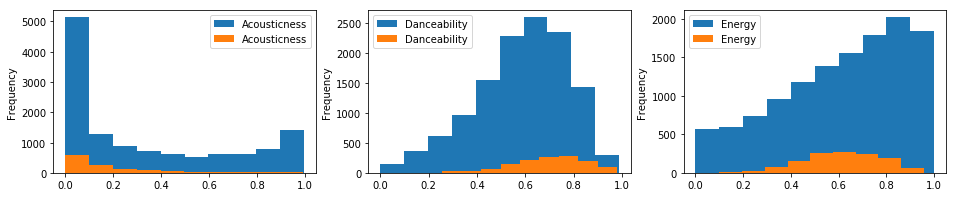

In [8]:
fig1, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(16,3))

df_rs.plot(kind="hist", x="URL", y="Acousticness", ax=ax1)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Acousticness", ax=ax1)
df_rs.plot(kind="hist", x="URL", y="Danceability", ax=ax2)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Danceability", ax=ax2)
df_rs.plot(kind="hist", x="URL", y="Energy", ax=ax3)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Energy", ax=ax3)

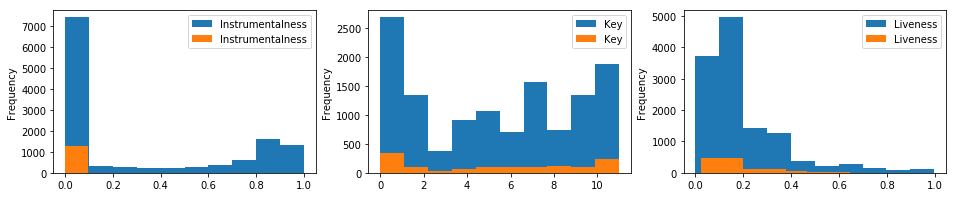

In [9]:
fig2, ((ax4, ax5, ax6)) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(16,3))

df_rs.plot(kind="hist", x="URL", y="Instrumentalness", ax=ax4)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Instrumentalness", ax=ax4)
df_rs.plot(kind="hist", x="URL", y="Key", ax=ax5)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Key", ax=ax5)
df_rs.plot(kind="hist", x="URL", y="Liveness", ax=ax6)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Liveness", ax=ax6)

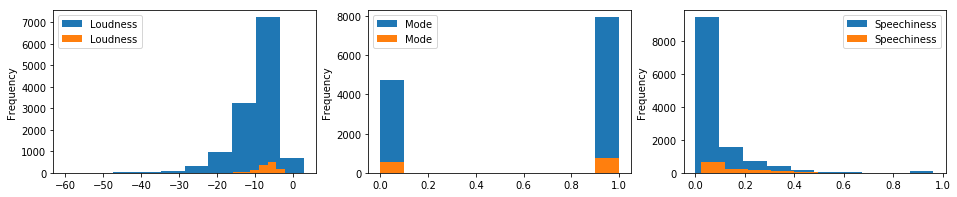

In [10]:
fig3, ((ax7, ax8, ax9)) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(16,3))

df_rs.plot(kind="hist", x="URL", y="Loudness", ax=ax7)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Loudness", ax=ax7)
df_rs.plot(kind="hist", x="URL", y="Mode", ax=ax8)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Mode", ax=ax8)
df_rs.plot(kind="hist", x="URL", y="Speechiness", ax=ax9)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Speechiness", ax=ax9)

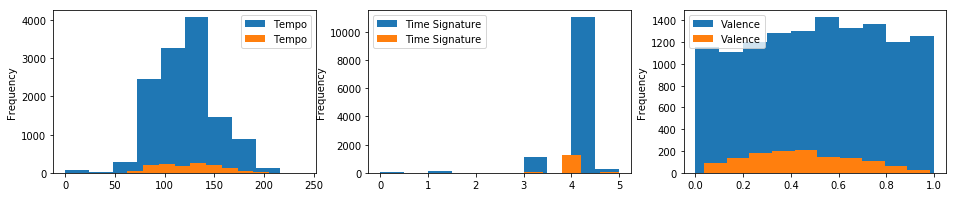

In [11]:
fig4, ((ax10, ax11, ax12)) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(16,3))

df_rs.plot(kind="hist", x="URL", y="Tempo", ax=ax10)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Tempo", ax=ax10)
df_rs.plot(kind="hist", x="URL", y="Time Signature", ax=ax11)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Time Signature", ax=ax11)
df_rs.plot(kind="hist", x="URL", y="Valence", ax=ax12)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Valence", ax=ax12)

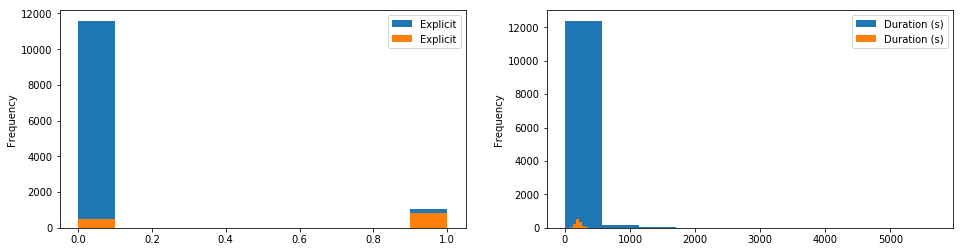

In [12]:
fig5, ((ax13, ax14)) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(16,4))

df_rs.plot(kind="hist", x="URL", y="Explicit", ax=ax13)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Explicit", ax=ax13)
df_rs.plot(kind="hist", x="URL", y="Duration (s)", ax=ax14)
df_combined.plot(kind="hist", x="2018 Total Streams", y="Duration (s)", ax=ax14)

# Feature vs Total Streams

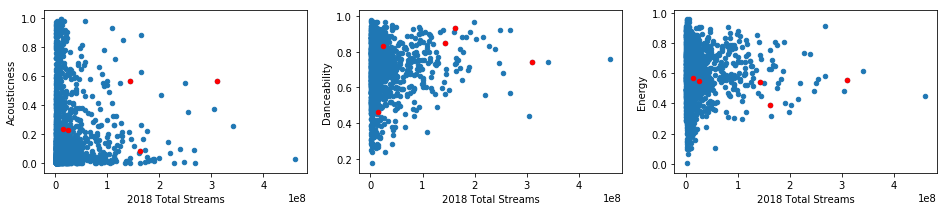

In [72]:
fig6, ((ax15, ax16, ax17)) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(16,3))

df_combined.plot(kind="scatter", x="2018 Total Streams", y="Acousticness", ax=ax15)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Acousticness", color="r", ax=ax15)
df_combined.plot(kind="scatter", x="2018 Total Streams", y="Danceability", ax=ax16)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Danceability", color="r", ax=ax16)
df_combined.plot(kind="scatter", x="2018 Total Streams", y="Energy", ax=ax17)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Energy", color="r", ax=ax17)

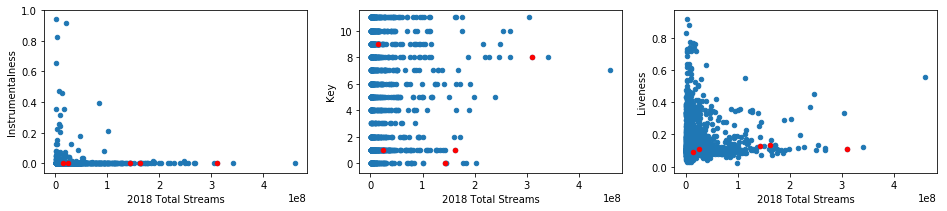

In [12]:
fig7, ((ax18, ax19, ax20)) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(16,3))

df_combined.plot(kind="scatter", x="2018 Total Streams", y="Instrumentalness", ax=ax18)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Instrumentalness", color="r", ax=ax18)
df_combined.plot(kind="scatter", x="2018 Total Streams", y="Key", ax=ax19)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Key", color="r", ax=ax19)
df_combined.plot(kind="scatter", x="2018 Total Streams", y="Liveness", ax=ax20)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Liveness", color="r", ax=ax20)

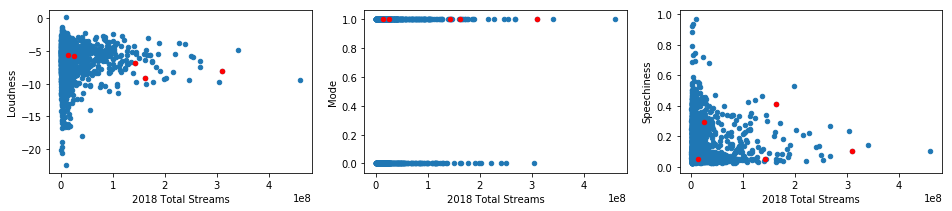

In [13]:
fig8, ((ax21, ax22, ax23)) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(16,3))

df_combined.plot(kind="scatter", x="2018 Total Streams", y="Loudness", ax=ax21)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Loudness", color="r", ax=ax21)
df_combined.plot(kind="scatter", x="2018 Total Streams", y="Mode", ax=ax22)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Mode", color="r", ax=ax22)
df_combined.plot(kind="scatter", x="2018 Total Streams", y="Speechiness", ax=ax23)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Speechiness", color="r", ax=ax23)

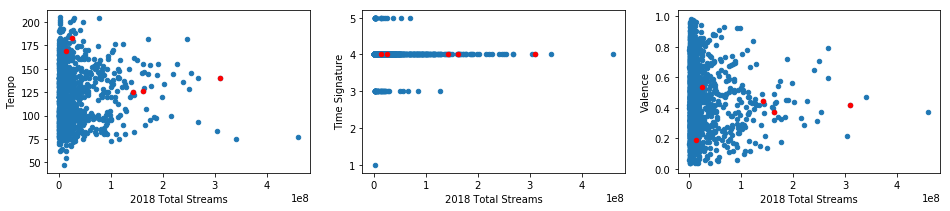

In [14]:
fig9, ((ax24, ax25, ax26)) = plt.subplots(nrows=1, ncols=3, sharey=False, figsize=(16,3))

df_combined.plot(kind="scatter", x="2018 Total Streams", y="Tempo", ax=ax24)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Tempo", color="r", ax=ax24)
df_combined.plot(kind="scatter", x="2018 Total Streams", y="Time Signature", ax=ax25)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Time Signature", color="r", ax=ax25)
df_combined.plot(kind="scatter", x="2018 Total Streams", y="Valence", ax=ax26)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Valence", color="r", ax=ax26)

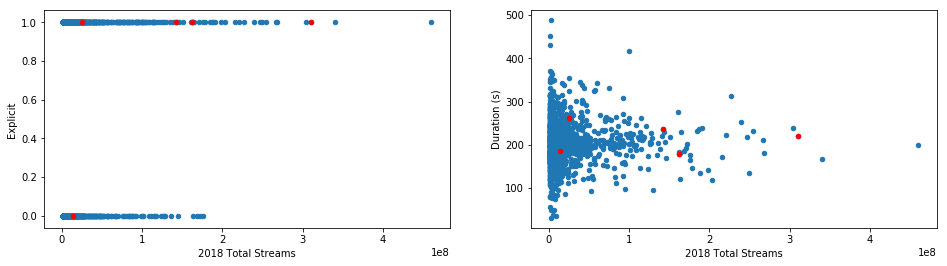

In [15]:
fig10, ((ax27, ax28)) = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(16,4))

df_combined.plot(kind="scatter", x="2018 Total Streams", y="Explicit", ax=ax27)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Explicit", color="r", ax=ax27)
df_combined.plot(kind="scatter", x="2018 Total Streams", y="Duration (s)", ax=ax28)
df_worst.plot(kind="scatter", x="2018 Total Streams", y="Duration (s)", color="r", ax=ax28)

# Stats Stuff

In [39]:
stats.ttest_1samp(df_top10["Duration (s)"], df_rs["Duration (s)"].mean())

Ttest_1sampResult(statistic=-3.7012087354089616, pvalue=0.004911360995553824)

# "Random" songs data

In [7]:
rs_filepath = "../data/clean/all_genres_song_list_enriched.csv"
df_rs = pd.read_csv(rs_filepath)
df_rs = df_rs.dropna()
df_rs["Duration (ms)"] = df_rs["Duration (ms)"] / 1000
df_rs.rename(columns={"Duration (ms)":"Duration (s)"}, inplace=True)
df_rs["Explicit"] = df_rs["Explicit"].astype(int)
df_rs

,URL,Acousticness,Album,Danceability,Duration (s),Energy,Explicit,Image,Instrumentalness,Key,Liveness,Loudness,Mode,Popularity,Speechiness,Tempo,Time Signature,Valence
0,https://open.spotify.com/track/15VIPlqNYLgN6T4...,0.184000,pop a pill,0.6880,180.808,0.5510,1,https://i.scdn.co/image/8f23487561c28f220873b5...,0.000000,0.0,0.1590,-6.299,0.0,67.0,0.2290,162.118,4.0,0.5580
1,https://open.spotify.com/track/3Jv1XgMPVjdN5xG...,0.068400,Excuse My French,0.7340,303.533,0.8930,1,https://i.scdn.co/image/64117d4092c32d69a3078e...,0.000000,2.0,0.7190,-1.847,1.0,60.0,0.1250,138.050,4.0,0.5950
2,https://open.spotify.com/track/4d6ihidBTDF0Sqw...,0.134000,Party Pack EP,0.8360,215.107,0.4890,1,https://i.scdn.co/image/b9eb3e80704d6d6754dbfe...,0.000000,0.0,0.0805,-10.484,1.0,59.0,0.3060,147.055,4.0,0.7320
3,https://open.spotify.com/track/23NWj2izXAJ4yL6...,0.234000,Pop Style,0.7950,209.453,0.4820,1,https://i.scdn.co/image/e312b96e13cda45938b8ea...,0.000004,11.0,0.1040,-8.995,1.0,58.0,0.2200,132.985,4.0,0.0602
4,https://open.spotify.com/track/2vVaKhH1Pah7Vyp...,0.219000,My Pop Christmas,0.6700,254.253,0.8060,0,https://i.scdn.co/image/0b629cc34833b5a3e891b7...,0.000000,0.0,0.2220,-4.823,1.0,63.0,0.0263,147.073,4.0,0.6890
5,https://open.spotify.com/track/03Dpt8Z4Zww4NGJ...,0.352000,Pop Christmas Songs,0.6260,228.916,0.5410,0,https://i.scdn.co/image/6c4da5dbc6d0fab738e05b...,0.000000,0.0,0.1190,-7.615,1.0,62.0,0.0308,112.001,4.0,0.2550
6,https://open.spotify.com/track/2yAVzRiEQooPEJ9...,0.259000,Europop,0.8220,283.748,0.9690,0,https://i.scdn.co/image/7c750ad7ffeabdf9812f1d...,0.000162,7.0,0.3900,-11.471,0.0,72.0,0.0582,128.007,4.0,0.7650
7,https://open.spotify.com/track/6TGapnqEUkkSBan...,0.000920,Phantom Pop,0.5400,162.453,0.8250,0,https://i.scdn.co/image/e1363419d85b472da98763...,0.000000,2.0,0.0488,-4.935,1.0,62.0,0.0563,148.059,4.0,0.6080
8,https://open.spotify.com/track/334S9SWZMjyRDN0...,0.173000,Views,0.7210,212.947,0.4610,1,https://i.scdn.co/image/90f080afbec29a0c585098...,0.000003,4.0,0.1050,-9.979,0.0,53.0,0.1070,133.072,4.0,0.0559
9,https://open.spotify.com/track/2XFP42EK7jg4bGH...,0.858000,A Love Letter To You 2,0.4500,237.317,0.6900,1,https://i.scdn.co/image/3d5102d06032eb59b01d02...,0.000000,0.0,0.0873,-8.218,1.0,60.0,0.1790,119.657,5.0,0.2320


# Usable Charts

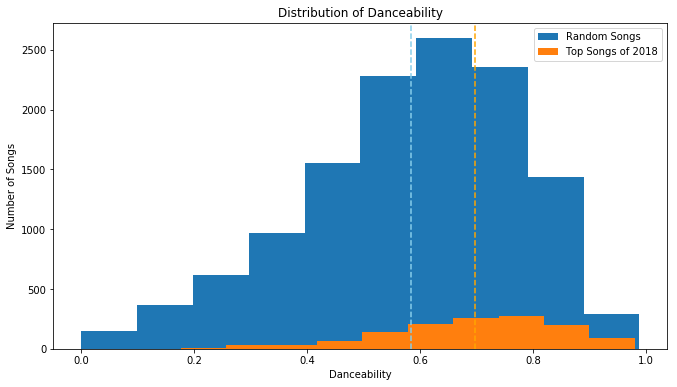

The P-Value of the "Danceability" of the top songs of 2018 vs a general sample of songs on Spotify is: 0.011329455495381493


In [26]:
plt.figure(figsize=(11,6))
plt.hist(df_rs["Danceability"], label="Random Songs")
plt.hist(df_combined["Danceability"], label="Top Songs of 2018")
plt.axvline(df_rs["Danceability"].mean(), color="skyblue", linestyle='dashed')
plt.axvline(df_combined["Danceability"].mean(), color="orange", linestyle='dashed')
plt.legend()
plt.title("Distribution of Danceability")
plt.xlabel("Danceability")
plt.ylabel("Number of Songs")
plt.savefig("Distribution_of_Danceability.png")
plt.show()


stat, pvalue = stats.ttest_1samp(df_top10["Danceability"], df_rs["Danceability"].mean())
print(f'The P-Value of the "Danceability" of the top songs of 2018 vs a general sample of songs on Spotify is: {pvalue}')

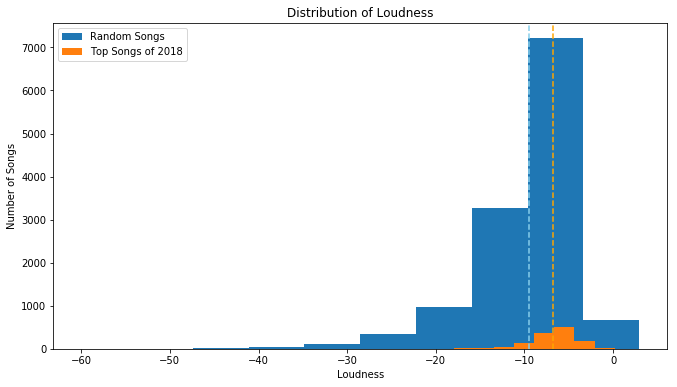

The P-Value of the "Loudness" of the top songs of 2018 vs a general sample of songs on Spotify is: 0.004365498430479394


In [30]:
plt.figure(figsize=(11,6))
plt.hist(df_rs["Loudness"], label="Random Songs")
plt.hist(df_combined["Loudness"], label="Top Songs of 2018")
plt.axvline(df_rs["Loudness"].mean(), color="skyblue", linestyle='dashed')
plt.axvline(df_combined["Loudness"].mean(), color="orange", linestyle='dashed')
plt.legend()
plt.title("Distribution of Loudness")
plt.xlabel("Loudness")
plt.ylabel("Number of Songs")
plt.savefig("Distribution_of_Loudness.png")
plt.show()


stat, pvalue = stats.ttest_1samp(df_top10["Loudness"], df_rs["Loudness"].mean())
print(f'The P-Value of the "Loudness" of the top songs of 2018 vs a general sample of songs on Spotify is: {pvalue}')

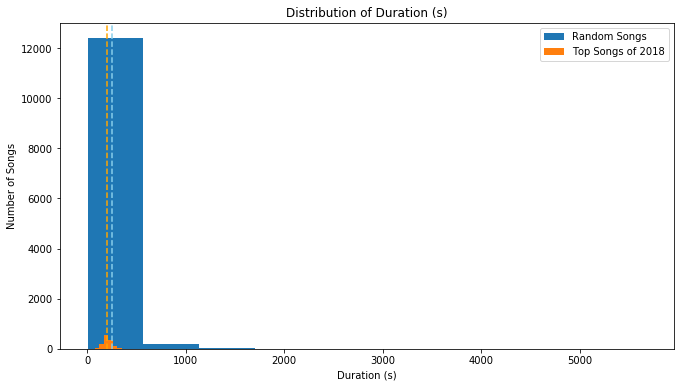

The P-Value of the "Duration (s)" of the top songs of 2018 vs a general sample of songs on Spotify is: 0.004911360995553824


In [42]:
plt.figure(figsize=(11,6))
plt.hist(df_rs["Duration (s)"], label="Random Songs")
plt.hist(df_combined["Duration (s)"], label="Top Songs of 2018")
plt.axvline(df_rs["Duration (s)"].mean(), color="skyblue", linestyle='dashed')
plt.axvline(df_combined["Duration (s)"].mean(), color="orange", linestyle='dashed')
plt.legend()
plt.title("Distribution of Duration (s)")
plt.xlabel("Duration (s)")
plt.ylabel("Number of Songs")
plt.savefig("Distribution_of_Duration.png")
plt.show()


stat, pvalue = stats.ttest_1samp(df_top10["Duration (s)"], df_rs["Duration (s)"].mean())
print(f'The P-Value of the "Duration (s)" of the top songs of 2018 vs a general sample of songs on Spotify is: {pvalue}')